# NN4

Daniel Tytkowski


### Classification problem

## Imports and data

In [2]:
! pip install networkx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 1.7 MB/s eta 0:00:0000:0100:01


In [3]:
import pandas as pd
import numpy as np
import utils as u
import matplotlib.pyplot as plt
import importlib
import math
import random

In [204]:
importlib.reload(u)

<module 'utils' from '/Users/danieltytkowski/MIO/utils.py'>

#### easy dataset

In [4]:
easy_train = pd.read_csv("./data/classification/easy-training.csv")
easy_test = pd.read_csv("./data/classification/easy-test.csv")


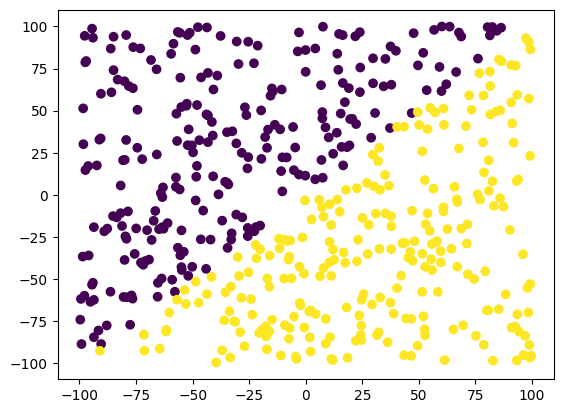

In [13]:
plt.scatter(easy_train["x"], easy_train["y"], c=easy_train["c"])

In [90]:
easy_train_x = np.array(easy_train[["x", "y"]])
easy_train_x.shape = (500,2)
easy_train_y = np.array(easy_train["c"])
easy_train_y.shape = (500,1)

In [104]:
easy_train_y = np.where(easy_train_y == True, [1,0], [0,1])

In [92]:
easy_test_x = np.array(easy_test[["x", "y"]])
easy_test_x.shape = (500,2)
easy_test_y = np.array(easy_test["c"])
easy_test_y.shape = (500,1)

In [197]:
easy_test_y = np.where(easy_test_y == True, [1,0], [0,1])

#### xor3 dataset

In [74]:
xor3_train = pd.read_csv("./data/classification/xor3-training.csv")
xor3_test = pd.read_csv("./data/classification/xor3-test.csv")


In [210]:
np.unique(xor3_train["c"])

array([0, 1])

In [213]:
xor3_train_x = np.array(xor3_train[["x", "y"]])
xor3_train_x.shape = (500, 2)
xor3_train_y = np.array(xor3_train["c"])
xor3_train_y.shape = (500,1)
xor3_train_y = np.where(xor3_train_y == 1, [1,0], [0,1])


In [215]:
xor3_test_x = np.array(xor3_test[["x", "y"]])
xor3_test_x.shape = (500, 2)
xor3_test_y = np.array(xor3_test["c"])
xor3_test_y.shape = (500,1)
xor3_test_y = np.where(xor3_test_y == 1, [1,0], [0,1])

In [214]:
xor3_train_y

array([[0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0,

In [77]:
xor3_train

,x,y,c
0,-5.720316,18.198653,0
1,50.039419,-71.390360,0
2,93.072781,-76.340256,0
3,10.434100,-21.863272,0
4,30.198218,-24.730234,0
...,...,...,...
495,-88.821359,14.624647,1
496,57.830467,12.097832,1
497,-31.530983,90.372797,1
498,-17.008097,65.769246,1


In [207]:
xor3_test

,x,y,c
0,36.973203,-55.586985,0
1,39.495972,78.216447,0
2,78.443533,77.156005,0
3,9.559384,-6.161679,0
4,42.216651,48.249953,0
...,...,...,...
495,60.541765,4.824937,1
496,-85.323235,-71.390509,0
497,-99.342156,13.327567,1
498,92.915510,-34.198818,0


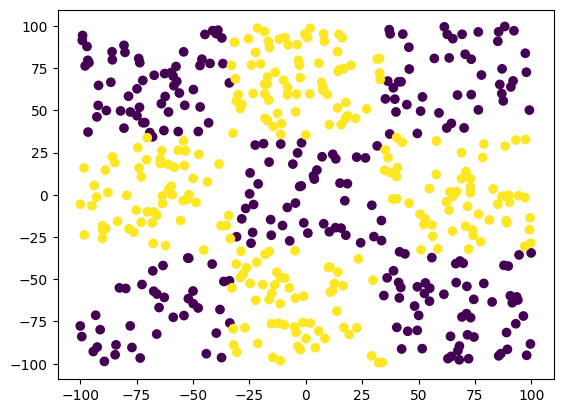

In [76]:
plt.scatter(xor3_train["x"], xor3_train["y"], c=xor3_train["c"])

#### rings3-reg dataset

In [82]:
rings_train =  pd.read_csv("./data/classification/rings3-regular-training.csv")
rings_test = pd.read_csv("./data/classification/rings3-regular-test.csv")


In [379]:
rings_test

,x,y,c
0,-38.564909,36.552799,2
1,57.976468,10.875187,1
2,12.842310,75.301701,1
3,23.052674,24.002605,0
4,-94.687082,-42.398002,0
...,...,...,...
1995,15.942323,61.892508,1
1996,-58.883401,71.805187,2
1997,-19.366566,75.249137,2
1998,39.954312,12.020821,0


In [360]:
np.unique(rings_train["c"])

array([0, 1, 2])

In [365]:
rings_train_x = np.array(rings_train[["x", "y"]])
rings_train_x.shape = (1500, 2)
rings_train_y = np.array(rings_train["c"])
rings_train_y.shape = (1500,1)
rings_train_y = np.where(rings_train_y == 0, [1, 0, 0],
                         np.where(rings_train_y == 1, [0, 1, 0], [0, 0, 1]))

In [380]:
rings_test_x = np.array(rings_test[["x", "y"]])
rings_test_x.shape = (2000, 2)
rings_test_y = np.array(rings_test["c"])
rings_test_y.shape = (2000,1)
rings_test_y = np.where(rings_test_y == 0, [1, 0, 0],
                         np.where(rings_test_y == 1, [0, 1, 0], [0, 0, 1]))

In [366]:
rings_train_y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

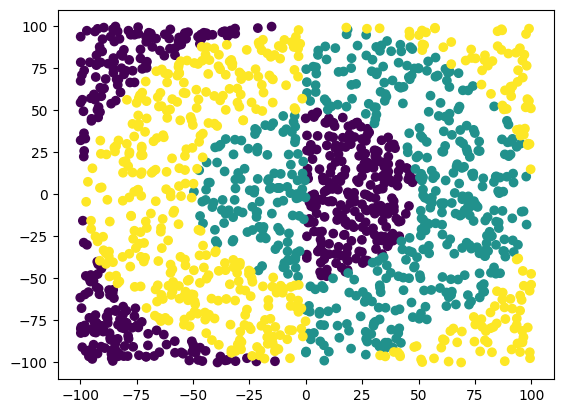

In [367]:
plt.scatter(rings_train["x"], rings_train["y"], c=rings_train["c"])

## Easy data set

In [112]:
def backpropagate(network, x, y, learning_rate):
    z = []
    deltas = []

    #number of layers to iterate through, substracting 1 cause entry layer does not count
    no_layers = len(network.layers)-1
    z.append(np.dot(x, network.w[0]) + network.b[0])

    for i in range(1,no_layers-1):
        z.append(np.dot(u.sigmoid(z[i-1]), network.w[i]) + network.b[i])

    z.append(u.softmax(np.dot(u.sigmoid(z[-1]), network.w[no_layers-1]) + network.b[no_layers-1]))
    
    deltas.append(z[-1]-y)

    for i in range(1, no_layers):
        deltas.append(u.derivative_sigmoid(z[-i-1])*np.dot(deltas[i-1], network.w[-i].transpose()))

    b_changes = []
    w_changes = []
    N = len(x)

    for i in range(len(deltas)):
        b_change = np.array(sum(deltas[-i-1])/N)
        b_change.shape = (1,network.layers[i+1])
        b_changes.append(b_change)
        if(i==0):
            w_changes.append(u.two_dim_avg(x, deltas[-1]))
        else:
            w_changes.append(u.two_dim_avg(u.sigmoid(z[i-1]), deltas[-i-1]))

    #return z, deltas, w_changes, b_changes

    for i in range(no_layers):
        network.b[i] -= b_changes[i]*learning_rate
        network.w[i] -= w_changes[i]*learning_rate

    
    return w_changes, b_changes

In [113]:
network1 = u.Network([2,10,2])

In [117]:
def plot2D(data, y):
    plt.scatter(data["x"], data["y"], c=y)

In [140]:
def decode(y_nn):
    return np.apply_along_axis(lambda x: np.argmin(x), 1, y_nn)

In [143]:
for i in range(10000):
    backpropagate(network1, easy_train_x, easy_train_y, 0.01)

In [205]:
y_nn = network1.calculate(easy_train_x)

In [206]:
u.f1(decode(y_nn), decode(easy_train_y), 2)

[1.0, 1.0]

In [152]:
y_nn = network1.calculate(easy_test_x)

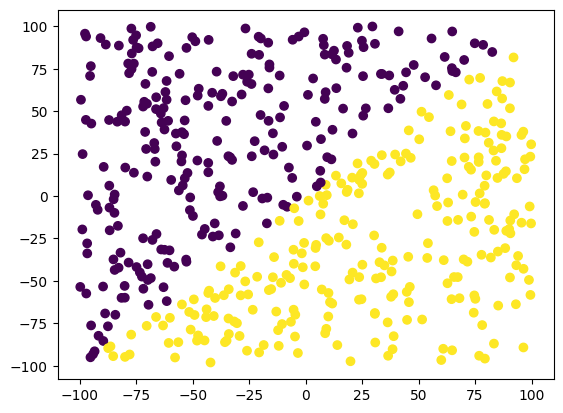

In [194]:
plot2D(easy_test, decode(y_nn))

In [200]:
y_nn = network1.calculate(easy_train_x)

In [202]:
y_nn = network1.calculate(easy_test_x)

In [203]:
f1(decode(y_nn), decode(easy_test_y), 2)

[0.9979879275653923, 0.9980119284294234]

## xor dataset


In [216]:
network2 = u.Network([2,10,2])

In [217]:
y_nn2 = network2.calculate(xor3_train_x)

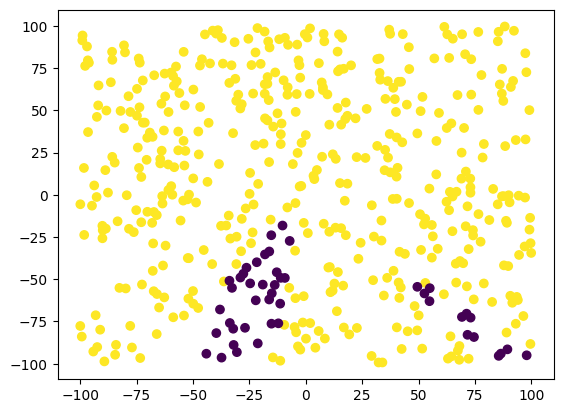

In [221]:
plot2D(xor3_train, decode(y_nn2))

In [231]:
def backpropagate_batch(network,x, y, learning_rate, batch_size):
    
    i = 0
    batches = [j for j in range(len(x))]
    random.shuffle(batches)
    while i < len(x):
        batch_x = x[batches[i:(i+batch_size)]]
        batch_y = y[batches[i:(i+batch_size)]]
        backpropagate(network, batch_x, batch_y, learning_rate)
        i+=batch_size

In [234]:
for i in range(10000):
    backpropagate_batch(network2, xor3_train_x, xor3_train_y, 0.001, 100)

In [235]:
y_nn2 = network2.calculate(xor3_train_x)

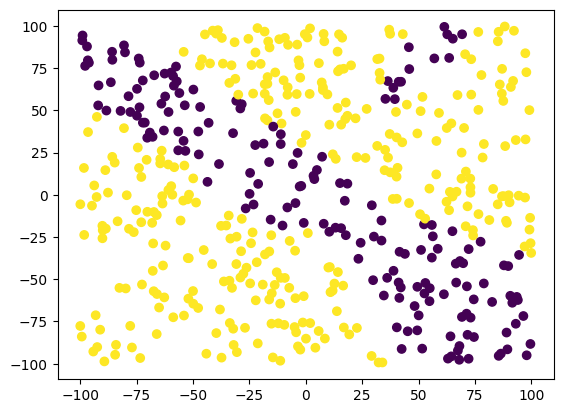

In [236]:
plot2D(xor3_train, decode(y_nn2))

In [237]:
u.f1(decode(y_nn2), decode(xor3_train_y),2)

[0.7122641509433962, 0.7881944444444444]

In [249]:
network2_2 = u.Network([2,40,2])

In [263]:
for i in range(20000):
    backpropagate_batch(network2_2, xor3_train_x, xor3_train_y, 0.001, 100)

In [270]:
y_nn2 = network2_2.calculate(xor3_train_x)

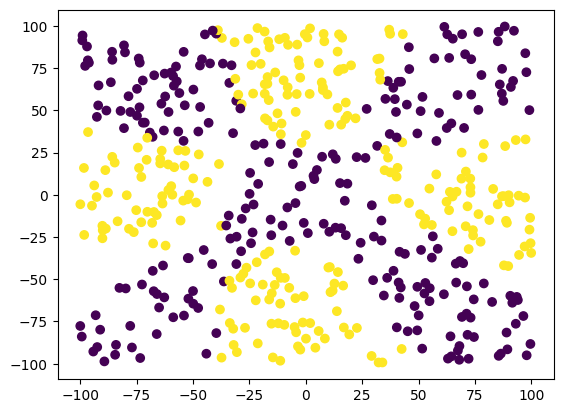

In [271]:
plot2D(xor3_train, decode(y_nn2))

In [272]:
u.f1(decode(y_nn2), decode(xor3_train_y),2)

[0.9304174950298211, 0.9295774647887324]

In [273]:
def init_moment(layers):
    w_moment = []
    b_moment = []

    for i in range(1,len(layers)):
        in_neurons = layers[i-1]
        out_neurons = layers[i]
        w_moment.append(np.zeros(shape=(in_neurons,out_neurons)))
        b_moment.append(np.zeros(shape=(1,out_neurons)))

    return b_moment, w_moment

In [276]:
def backpropagate_moment(network, x, y, learning_rate, b_moment, w_moment, lambd):
    z = []
    deltas = []

    #number of layers to iterate through, substracting 1 cause entry layer does not count
    no_layers = len(network.layers)-1
    z.append(np.dot(x, network.w[0]) + network.b[0])

    for i in range(1,no_layers-1):
        z.append(np.dot(u.sigmoid(z[i-1]), network.w[i]) + network.b[i])

    z.append(u.softmax(np.dot(u.sigmoid(z[-1]), network.w[no_layers-1]) + network.b[no_layers-1]))
    
    deltas.append(z[-1]-y)

    for i in range(1, no_layers):
        deltas.append(u.derivative_sigmoid(z[-i-1])*np.dot(deltas[i-1], network.w[-i].transpose()))

    b_changes = []
    w_changes = []
    N = len(x)

    for i in range(len(deltas)):
        b_change = np.array(sum(deltas[-i-1])/N)
        b_change.shape = (1,network.layers[i+1])
        b_changes.append(b_change)
        if(i==0):
            w_changes.append(u.two_dim_avg(x, deltas[-1]))
        else:
            w_changes.append(u.two_dim_avg(u.sigmoid(z[i-1]), deltas[-i-1]))

    #return z, deltas, w_changes, b_changes

    for i in range(no_layers):
        b_moment[i] = b_changes[i] + lambd*b_moment[i]
        w_moment[i] = w_changes[i] + lambd*w_moment[i]

        network.b[i] -= b_moment[i]*learning_rate
        network.w[i] -= w_moment[i]*learning_rate

    
    return b_moment, w_moment

In [ ]:
def backpropagate_batch_moment(network,x, y, learning_rate, b_moment, w_moment, lambd, batch_size):
    
    i = 0
    batches = [j for j in range(len(x))]
    random.shuffle(batches)
    while i < len(x):
        batch_x = x[batches[i:(i+batch_size)]]
        batch_y = y[batches[i:(i+batch_size)]]
        backpropagate_moment(network, batch_x, batch_y, learning_rate, b_moment, w_moment, lambd)
        i+=batch_size

In [268]:
network2_3 = u.Network([2,40,2])

In [274]:
b_moment, w_moment = init_moment(network2_3.layers)

In [297]:
for i in range(10000):
    b_moment, w_moment = backpropagate_moment(network2_3, xor3_train_x, xor3_train_y, 0.01, b_moment, w_moment, 0.9)

In [298]:
y_nn2_3 = network2_3.calculate(xor3_train_x)

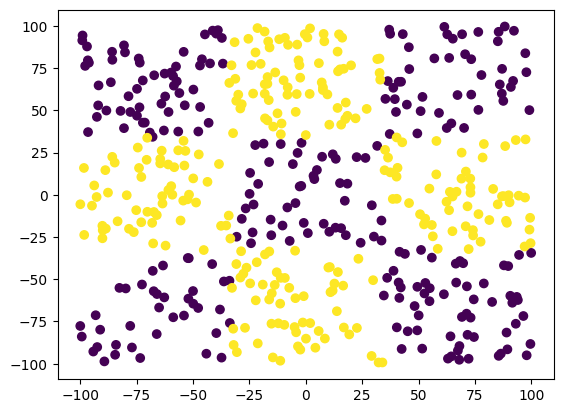

In [299]:
plot2D(xor3_train, decode(y_nn2_3))

In [300]:
u.f1(decode(xor3_train_y), decode(y_nn2_3),2)

[0.996, 0.996]

In [304]:
y_nn2_test = network2_3.calculate(xor3_test_x)

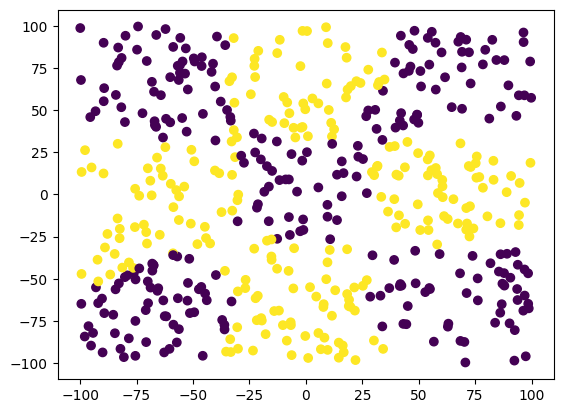

In [305]:
plot2D(xor3_test, decode(y_nn2_test))

In [306]:
u.f1(decode(y_nn2_test), decode(xor3_test_y),2)

[0.9168141592920354, 0.8919540229885058]

In [308]:
network2_4 = u.Network([2,10,2])

In [309]:
b_moment, w_moment = init_moment(network2_4.layers)

In [337]:
for i in range(10000):
    b_moment, w_moment = backpropagate_moment(network2_4, xor3_train_x, xor3_train_y, 0.01, b_moment, w_moment, 0.9)

In [338]:
y_nn2_4 = network2_4.calculate(xor3_train_x)

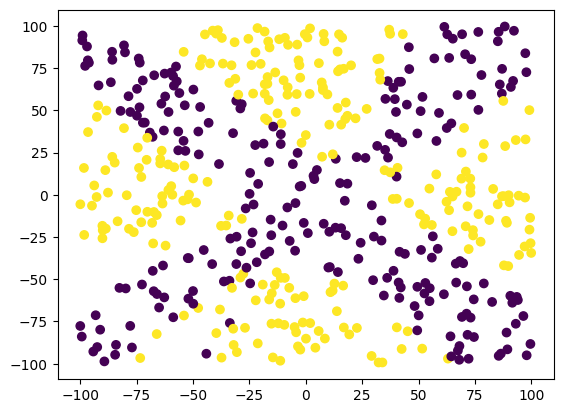

In [339]:
plot2D(xor3_train, decode(y_nn2_4))

In [340]:
y_nn2_4test = network2_4.calculate(xor3_test_x)

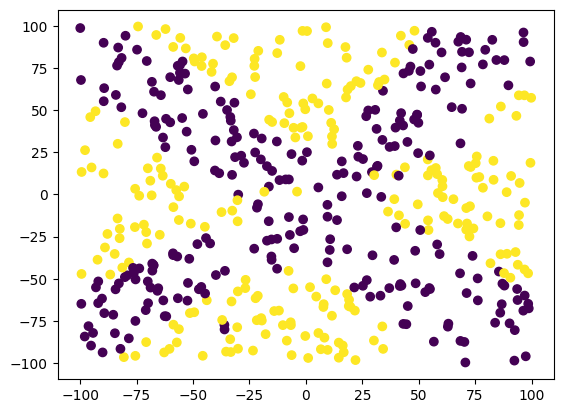

In [341]:
plot2D(xor3_test, decode(y_nn2_4test))

In [342]:
u.f1(decode(y_nn2_4test), decode(xor3_test_y), 2)

[0.8093525179856115, 0.7612612612612613]

Na większej architekturze mozna zaobserwowac delikatny overfitting. Widac to przy dziurze przy dolnym lewym fioletowym kwadracie, gdzie w zbiorze testowym jest on wypełniona. Z drugiej strony przy mniejszych architekturach sieci tworzą bardziej kształt X niz kwadraty(prostokąty)

## rings3 dataset

In [368]:
network3_1 = u.Network([2,40,3])

In [369]:
b_moment, w_moment = init_moment(network3_1.layers)

In [370]:
for i in range(10000):
    b_moment, w_moment = backpropagate_moment(network3_1, rings_train_x, rings_train_y, 0.01, b_moment, w_moment, 0.9)

In [371]:
# zmiana decode wczesniej byl blad (argmin zamiast argmax), ale dzialalo bo byly tylko 2 labele
def decode(y_nn):
    return np.apply_along_axis(lambda x: np.argmax(x), 1, y_nn)


In [372]:
y_nn3 = network3_1.calculate(rings_train_x)

In [374]:
decode(y_nn3)

array([0, 0, 0, ..., 2, 2, 2])

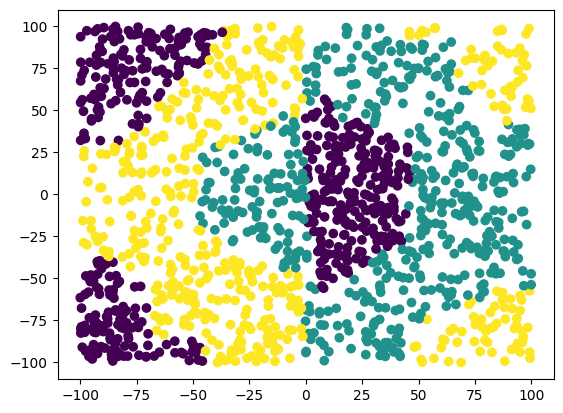

In [375]:
plot2D(rings_train, decode(y_nn3))

In [387]:
rings_train_y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [378]:
u.f1(decode(rings_train_y), decode(y_nn3), 3)

[0.9130009775171065, 0.9265873015873016, 0.8710010319917441]

In [381]:
y_nn3_test = network3_1.calculate(rings_test_x)

In [388]:
np.mean(u.f1(decode(y_nn3_test), decode(rings_test_y), 3))

0.8863553829926589

## Porównanie softmax do zwykłej funkcji aktywacji

Wiem moglem dac funkcje jako argument, ale nie wiem gdzie dokladnie musze to zmienic i nie chcialem zeby notebook przestal dzialac

In [384]:
def backpropagate_moment_no_softmax(network, x, y, learning_rate, b_moment, w_moment, lambd):
    z = []
    deltas = []

    #number of layers to iterate through, substracting 1 cause entry layer does not count
    no_layers = len(network.layers)-1
    z.append(np.dot(x, network.w[0]) + network.b[0])

    for i in range(1,no_layers-1):
        z.append(np.dot(u.sigmoid(z[i-1]), network.w[i]) + network.b[i])

    z.append(np.dot(u.sigmoid(z[-1]), network.w[no_layers-1]) + network.b[no_layers-1])
    
    deltas.append(z[-1]-y)

    for i in range(1, no_layers):
        deltas.append(u.derivative_sigmoid(z[-i-1])*np.dot(deltas[i-1], network.w[-i].transpose()))

    b_changes = []
    w_changes = []
    N = len(x)

    for i in range(len(deltas)):
        b_change = np.array(sum(deltas[-i-1])/N)
        b_change.shape = (1,network.layers[i+1])
        b_changes.append(b_change)
        if(i==0):
            w_changes.append(u.two_dim_avg(x, deltas[-1]))
        else:
            w_changes.append(u.two_dim_avg(u.sigmoid(z[i-1]), deltas[-i-1]))

    #return z, deltas, w_changes, b_changes

    for i in range(no_layers):
        b_moment[i] = b_changes[i] + lambd*b_moment[i]
        w_moment[i] = w_changes[i] + lambd*w_moment[i]

        network.b[i] -= b_moment[i]*learning_rate
        network.w[i] -= w_moment[i]*learning_rate

    
    return b_moment, w_moment

In [389]:
network4_1 = u.Network([2,40,3])
network4_2 = u.Network([2,40,3])

In [392]:
b_moment, w_moment = init_moment(network4_1.layers)
f1_softmax = []

In [393]:
for i in range(10000):
    b_moment, w_moment = backpropagate_moment(network4_1, rings_train_x, rings_train_y, 0.01, b_moment, w_moment, 0.9)
    y = network4_1.calculate(rings_test_x)
    f = u.f1(decode(y), decode(rings_test_y), 3)
    f1_softmax.append(np.mean(f))
    

In [394]:
b_moment, w_moment = init_moment(network4_1.layers)
f1_no_softmax = []

In [395]:
for i in range(10000):
    b_moment, w_moment = backpropagate_moment_no_softmax(network4_2, rings_train_x, rings_train_y, 0.01, b_moment, w_moment, 0.9)
    y = network4_2.calculate(rings_test_x)
    f = u.f1(decode(y), decode(rings_test_y), 3)
    f1_no_softmax.append(np.mean(f))

In [406]:
y_nn4_2 = network4_2.calculate(rings_train_x)

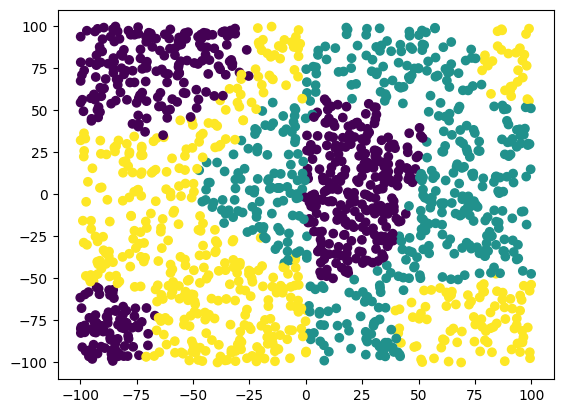

In [408]:
plot2D(rings_train, decode(y_nn4_2))

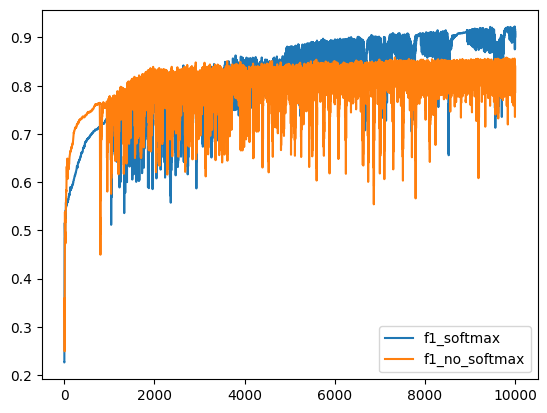

In [405]:
plt.plot(f1_softmax, label='f1_softmax')
plt.plot(f1_no_softmax, label='f1_no_softmax')
plt.legend()

Sieci uczą się podobnie szybko natomiast softmax daje lepsze wyniki przy dluzszym uczeniu

## 